In [7]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")
sys.path.insert(0, "./src/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from scipy import signal
import numpy as np
import pandas as pd
from plot_raw import plot_raw
from matplotlib import pyplot as plt

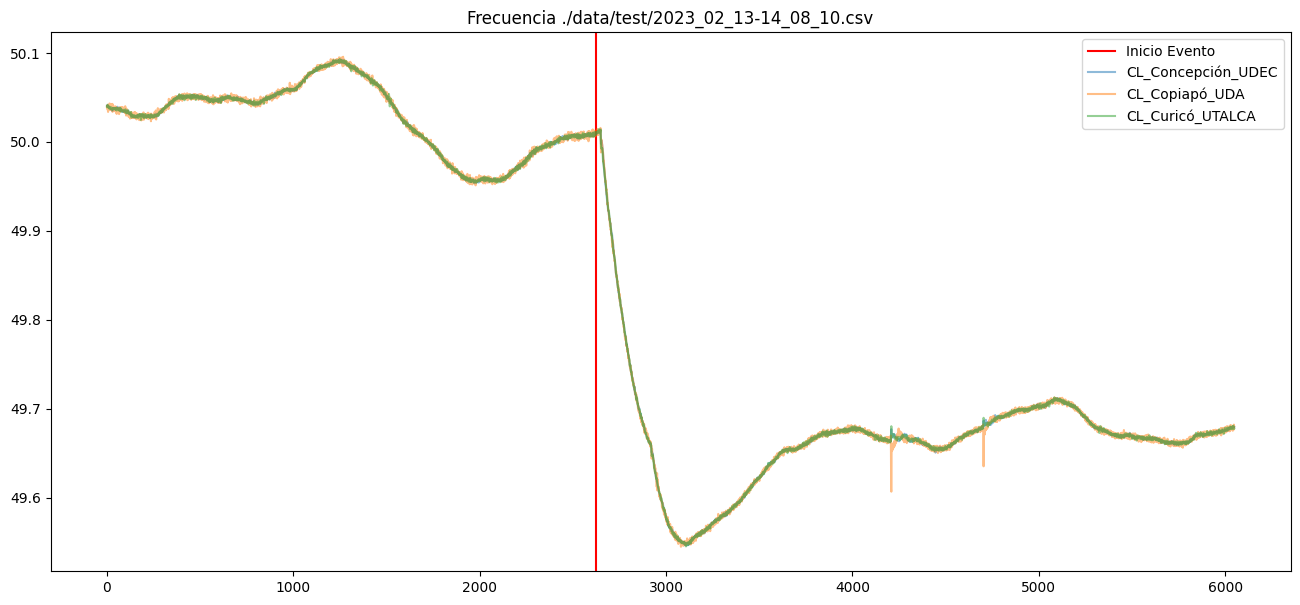

In [3]:
## Ejemplo uso plot_raw

input_path = "./data/test/2023_02_13-14_08_10.csv"
fig = plot_raw(input_path)

In [11]:
## EJemplo uso scipy.optimize.differential_evolution y plot_result
from sampler import sampler
from scipy.optimize import differential_evolution
from objective_function import objective_function

#input_path = "./data/raw/2021_set_n1/2021_05_02-16_44_00.csv"
input_path = "./data/raw/2021_set_n1/2021_06_19-09_04_00.csv"

model = 1
Ts = 0.3
df = sampler(input_path, Ts, event_time=25)
P0 = df["power"][0] / 1000


event_freq = df["freq"][df["event"]==1].to_numpy()

bounds = [(0.00001, 1000) for i in range(6)]
arguments = (model, Ts, P0, event_freq)
result = differential_evolution(objective_function, bounds, args=(arguments,), disp=True, popsize=30, tol=0.01, mutation=(0.5, 1.5), recombination=0.6)

result

differential_evolution step 1: f(x)= 49.5165
differential_evolution step 2: f(x)= 32.8943
differential_evolution step 3: f(x)= 24.5923
differential_evolution step 4: f(x)= 24.5923
differential_evolution step 5: f(x)= 24.5923
differential_evolution step 6: f(x)= 24.5923
differential_evolution step 7: f(x)= 21.4149
differential_evolution step 8: f(x)= 21.4149
differential_evolution step 9: f(x)= 21.4149
differential_evolution step 10: f(x)= 21.4149
differential_evolution step 11: f(x)= 21.4149
differential_evolution step 12: f(x)= 18.8581
differential_evolution step 13: f(x)= 15.6722
differential_evolution step 14: f(x)= 15.6722
differential_evolution step 15: f(x)= 15.6722
differential_evolution step 16: f(x)= 15.6722
differential_evolution step 17: f(x)= 14.9951
differential_evolution step 18: f(x)= 14.9951
differential_evolution step 19: f(x)= 14.9951
differential_evolution step 20: f(x)= 14.9951
differential_evolution step 21: f(x)= 14.9951
differential_evolution step 22: f(x)= 14.99

 message: Optimization terminated successfully.
 success: True
     fun: 0.40189821833296624
       x: [ 1.602e+00  1.000e-05  6.647e+02  6.293e+00  3.002e+02
            1.000e-05]
     nit: 201
    nfev: 36465
     jac: [ 2.119e-05  1.304e-02  0.000e+00 -4.330e-07 -2.890e-05
            2.457e-01]

Text(0.5, 1.0, './data/raw/2021_set_n1/2021_06_19-09_04_00.csv')

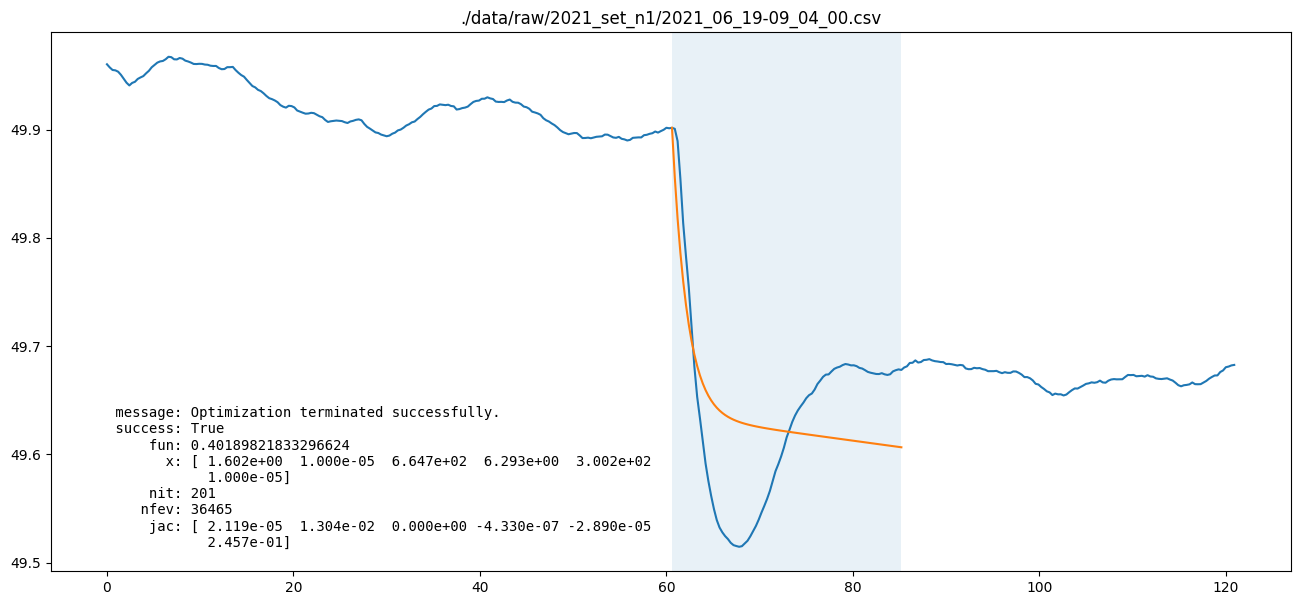

In [12]:
from plot_result import plot_result
fig = plot_result(df, arguments, result.x)
plt.text(0, min(event_freq), repr(result), fontsize=10, fontfamily='monospace' )
plt.title(input_path)

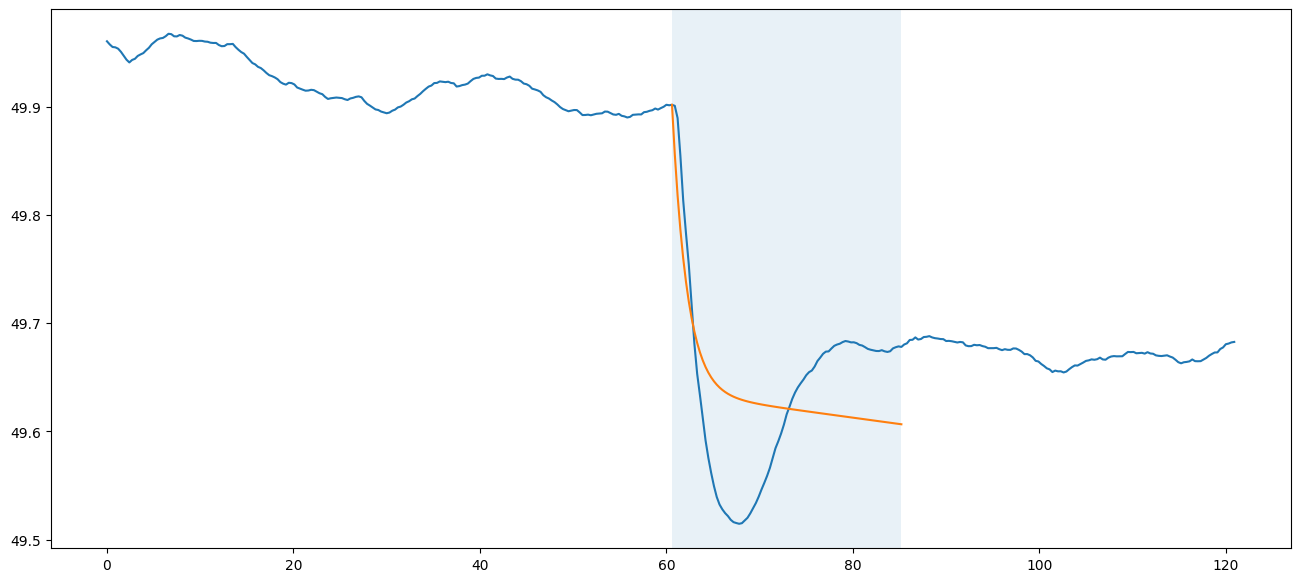

In [6]:
from objective_function import modelo_1

fig_size = (16, 7)
sys = modelo_1(result.x, Ts)
        
sim_power = P0 * np.repeat(1, event_freq.shape)
sim = signal.dlsim(sys, sim_power, x0 = event_freq[0])
sim_freq = sim[1].ravel()
    
real_time = df["time"].to_numpy()
real_freq = df["freq"].to_numpy()
event_time = df["time"][df["event"]==1].to_numpy()
sim_time = np.arange(event_time[0],event_time[-1],Ts)

fig = plt.figure(figsize=fig_size)
    
plt.plot(real_time,real_freq)
plt.axvspan(event_time.min(),event_time.max(), alpha=.1)
plt.plot(sim_time,sim[1])

In [9]:
sim_time.size

83

In [10]:
# Ejemplo uso objective_function
from src.objective_function import objective_function

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

model =1
Ts = 0.1

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()

P0 = df["Potencia [MW]"][0]/1000

args = (model, Ts, P0, event_freq)

objective_function(params, args)

428159.742116734


428159.742116734